In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_df = pd.read_csv("results/base_results.csv")
base_df.head()

,Day,Source,Destination,Total Cargo,Aircraft w/ Cargo,Leftover Cargo,Aircraft Repositioning,Demand,Route,Unnamed: 9,Repositioning Cost
0,1,A,B,275,185,175,0,100,AB,AB,0.0
1,5,A,C,50,50,0,0,50,AC,AC,0.0
2,5,A,B,300,125,0,0,300,AB,AB,0.0
3,4,A,C,50,50,0,0,50,AC,AC,0.0
4,4,A,B,400,400,0,0,400,AB,AB,0.0


In [3]:
cargo_dict = {
    "Day":[],
    "Source":[],
    "Destination":[],
    "Total Cargo":[],
    "Aircraft w/ Cargo":[],
    "Leftover Cargo":[],
    "Aircraft Repositioning":[],
    "Demand":[]
}
cargo_dict["Day"].extend([1]*6)
cargo_dict["Source"].extend(["A","A", "B", "B","C","C"])
cargo_dict["Destination"].extend(["B","C", "A","C","A","B"])
cargo_dict["Total Cargo"].extend([100, 50, 25, 25, 40, 400])
cargo_dict["Aircraft w/ Cargo"].extend([100, 50, 25, 25, 40, 400])
cargo_dict["Demand"].extend([100, 50, 25, 25, 40, 400])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 650, 185, 25])

cargo_dict["Day"].extend([2]*6)
cargo_dict["Source"].extend(["A","A", "B", "B","C","C"])
cargo_dict["Destination"].extend(["B","C", "A","C","A","B"])
cargo_dict["Total Cargo"].extend([200, 50, 25, 25, 40, 200])
cargo_dict["Aircraft w/ Cargo"].extend([200, 50, 25, 25, 40, 200])
cargo_dict["Demand"].extend([200, 50, 25, 25, 40, 200])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 475, 85, 400])

cargo_dict["Day"].extend([3]*6)
cargo_dict["Source"].extend(["A","A", "B", "B","C","C"])
cargo_dict["Destination"].extend(["B","C", "A","C","A","B"])
cargo_dict["Total Cargo"].extend([100, 50, 25, 25, 40, 300])
cargo_dict["Aircraft w/ Cargo"].extend([100, 50, 25, 25, 40, 300])
cargo_dict["Demand"].extend([100, 50, 25, 25, 40, 300])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 190, 560, 195, 15])

cargo_dict["Day"].extend([4]*6)
cargo_dict["Source"].extend(["A","A", "B", "B","C","C"])
cargo_dict["Destination"].extend(["B","C", "A","C","A","B"])
cargo_dict["Total Cargo"].extend([400, 50, 25, 25, 40, 200])
cargo_dict["Aircraft w/ Cargo"].extend([400, 50, 25, 25, 40, 200])
cargo_dict["Demand"].extend([400, 50, 25, 25, 40, 200])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 0, 365, 285, 110])

cargo_dict["Day"].extend([5]*6)
cargo_dict["Source"].extend(["A","A", "B", "B","C","C"])
cargo_dict["Destination"].extend(["B","C", "A","C","A","B"])
cargo_dict["Total Cargo"].extend([300, 50, 25, 25, 40, 400])
cargo_dict["Aircraft w/ Cargo"].extend([300, 50, 25, 25, 40, 400])
cargo_dict["Demand"].extend([300, 50, 25, 25, 40, 400])
cargo_dict["Aircraft Repositioning"].extend([0, 0, 85, 575, 0, 0])

cargo_dict["Leftover Cargo"].extend([0]*6*5)

cargo_df = pd.DataFrame.from_dict(cargo_dict)
cargo_df

,Day,Source,Destination,Total Cargo,Aircraft w/ Cargo,Leftover Cargo,Aircraft Repositioning,Demand
0,1,A,B,100,100,0,0,100
1,1,A,C,50,50,0,0,50
2,1,B,A,25,25,0,0,25
3,1,B,C,25,25,0,650,25
4,1,C,A,40,40,0,185,40
5,1,C,B,400,400,0,25,400
6,2,A,B,200,200,0,0,200
7,2,A,C,50,50,0,0,50
8,2,B,A,25,25,0,0,25
9,2,B,C,25,25,0,475,25


In [4]:
leftover_cargo = []
for d in range(2,6):
    curr_df = cargo_df[cargo_df["Day"]==d]
    prev_df = cargo_df[cargo_df["Day"]==d-1]
    leftovers = prev_df["Total Cargo"] - prev_df["Aircraft w/ Cargo"]
    cargo_df.loc[curr_df.index,"Leftover Cargo"] = leftovers.values

curr_df = cargo_df[cargo_df["Day"]==1]
prev_df = cargo_df[cargo_df["Day"]==5]
leftovers = prev_df["Total Cargo"] - prev_df["Aircraft w/ Cargo"]
cargo_df.loc[curr_df.index,"Leftover Cargo"] = leftovers.values

cargo_df["Route"] = [row.Source+row.Destination for _,row in cargo_df.iterrows()]
cargo_df[""] = [row.Source+row.Destination for _,row in cargo_df.iterrows()]

In [5]:
cargo_df.head()

,Day,Source,Destination,Total Cargo,Aircraft w/ Cargo,Leftover Cargo,Aircraft Repositioning,Demand,Route,
0,1,A,B,100,100,0,0,100,AB,AB
1,1,A,C,50,50,0,0,50,AC,AC
2,1,B,A,25,25,0,0,25,BA,BA
3,1,B,C,25,25,0,650,25,BC,BC
4,1,C,A,40,40,0,185,40,CA,CA


In [6]:
cargo_df.sort_values(by="Source",ascending=True,inplace=True)

#### Are we meeting demand?

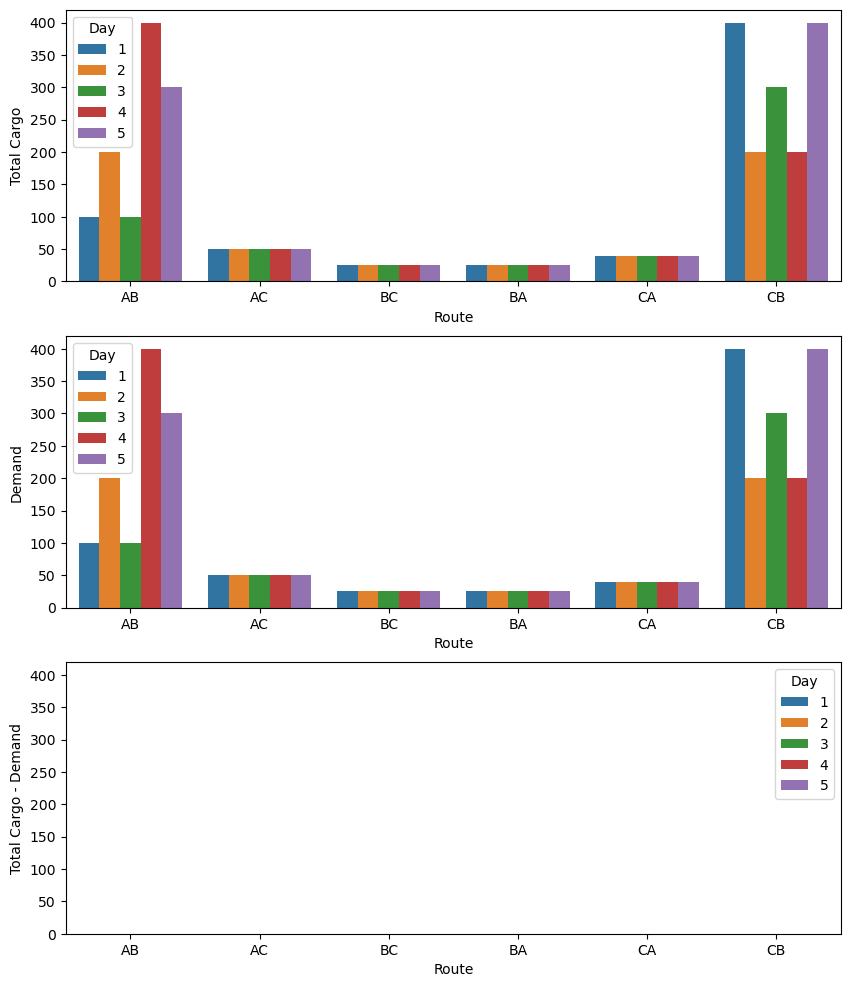

In [7]:
df = cargo_df.copy()
df["Total Cargo - Demand"] = df["Total Cargo"] - df["Demand"]

fig,axes = plt.subplots(3,1,figsize=(10,12),sharey=True)
sns.barplot(data=df, x="Route", y="Total Cargo", hue="Day", palette="tab10",ax=axes[0])
sns.barplot(data=df, x="Route", y="Demand", hue="Day", palette="tab10",ax=axes[1])
sns.barplot(data=df, x="Route", y="Total Cargo - Demand", hue="Day", palette="tab10",ax=axes[2])
plt.show()

#### Leftover cargo

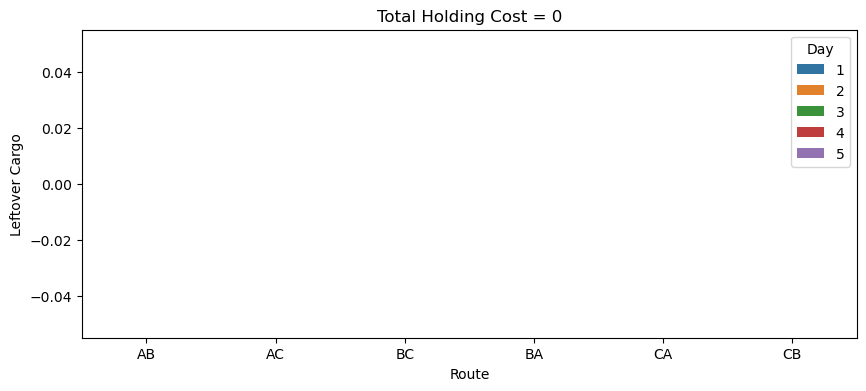

In [8]:
total_holding_cost = 10 * cargo_df["Leftover Cargo"].sum()

plt.figure(figsize=(10,4))
sns.barplot(data=cargo_df, x="Route",y="Leftover Cargo",hue="Day",palette="tab10")
plt.title(f"Total Holding Cost = {np.round(total_holding_cost,2)}")
plt.show()

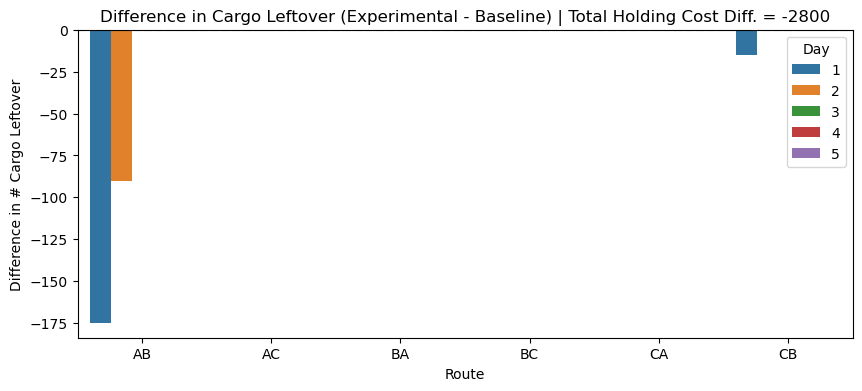

In [9]:
base_group = base_df.groupby(by=["Day","Route"],as_index=False).sum()
base_leftovers = base_group["Leftover Cargo"].tolist()
base_leftover_cost = base_group["Leftover Cargo"].sum() * 10

exp_group = cargo_df.groupby(by=["Day","Route"],as_index=False).sum()
exp_leftovers = exp_group["Leftover Cargo"].tolist()

routes = base_group["Route"].tolist()
days = base_group["Day"].tolist()

leftover_df = pd.DataFrame.from_dict({
    "Route":routes, "Diff":[exp - base for exp,base in zip(exp_leftovers, base_leftovers)], "Day":days
})

plt.figure(figsize=(10,4))
sns.barplot(data=leftover_df, x="Route",y="Diff",hue="Day",palette="tab10")
plt.axhline([0], ls="--",c="k",alpha=0.5)
plt.ylabel("Difference in # Cargo Leftover")
plt.title(f"Difference in Cargo Leftover (Experimental - Baseline) | Total Holding Cost Diff. = {np.round(total_holding_cost - base_leftover_cost,2)}")
plt.show()

#### Repositioning aircrafts

In [10]:
repos_cost = {
    "AB": 7.0,   # A->B
    "AC": 6.0,   # A->C
    "BA": 7.0,   # B->A -- double
    "BC": 3.0,   # B->C -- triple
    "CA": 6.0,   # C->A -- double
    "CB": 3.0,   # C->B
}

cargo_df["Repositioning Cost"] = [repos_cost[row.Route]*row["Aircraft Repositioning"] for _,row in cargo_df.iterrows()]

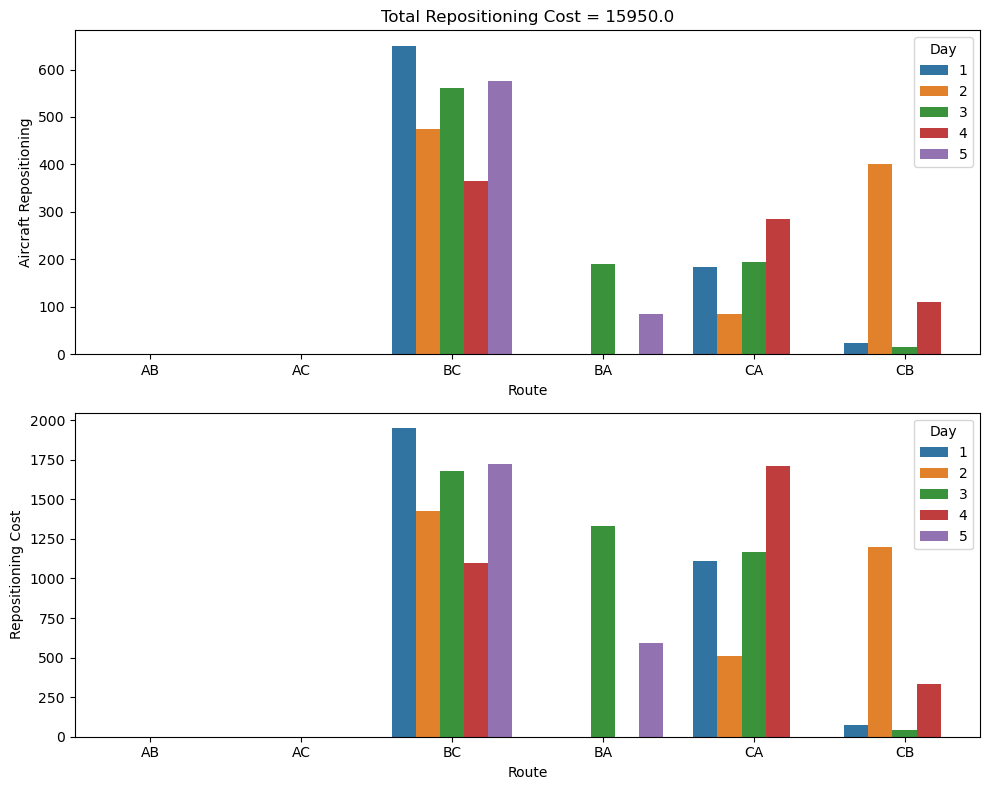

In [11]:
fig,axes = plt.subplots(2,1,figsize=(10,8))
sns.barplot(data=cargo_df, x="Route",y="Aircraft Repositioning",hue="Day",palette="tab10",ax=axes[0])
sns.barplot(data=cargo_df, x="Route",y="Repositioning Cost",hue="Day",palette="tab10",ax=axes[1])
axes[0].set_title(f"Total Repositioning Cost = {np.round(cargo_df["Repositioning Cost"].sum(), 2)}")
plt.tight_layout()
plt.show()

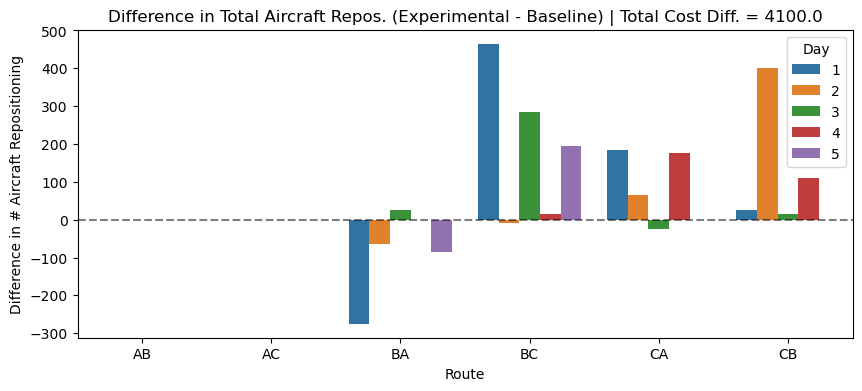

In [12]:
base_group = base_df.groupby(by=["Day","Route"],as_index=False).sum()
base_repos = base_group["Aircraft Repositioning"].tolist()
base_repos_cost = base_group["Repositioning Cost"].sum()

exp_group = cargo_df.groupby(by=["Day","Route"],as_index=False).sum()
exp_repos = exp_group["Aircraft Repositioning"].tolist()
total_repos_cost = exp_group["Repositioning Cost"].sum()

routes = base_group["Route"].tolist()
days = base_group["Day"].tolist()

repos_df = pd.DataFrame.from_dict({
    "Route":routes, "Diff":[exp - base for exp,base in zip(exp_repos, base_repos)], "Day":days
})

plt.figure(figsize=(10,4))
sns.barplot(data=repos_df, x="Route",y="Diff",hue="Day",palette="tab10")
plt.axhline([0], ls="--",c="k",alpha=0.5)
plt.ylabel("Difference in # Aircraft Repositioning")
plt.title(f"Difference in Total Aircraft Repos. (Experimental - Baseline) | Total Cost Diff. = {np.round(total_repos_cost - base_repos_cost,2)}")
plt.show()

In [13]:
cargo_df.groupby(by=["Source","Destination"],as_index=False).sum()

,Source,Destination,Day,Total Cargo,Aircraft w/ Cargo,Leftover Cargo,Aircraft Repositioning,Demand,Route,,Repositioning Cost
0,A,B,15,1100,1100,0,0,1100,ABABABABAB,ABABABABAB,0.0
1,A,C,15,250,250,0,0,250,ACACACACAC,ACACACACAC,0.0
2,B,A,15,125,125,0,275,125,BABABABABA,BABABABABA,1925.0
3,B,C,15,125,125,0,2625,125,BCBCBCBCBC,BCBCBCBCBC,7875.0
4,C,A,15,200,200,0,750,200,CACACACACA,CACACACACA,4500.0
5,C,B,15,1500,1500,0,550,1500,CBCBCBCBCB,CBCBCBCBCB,1650.0


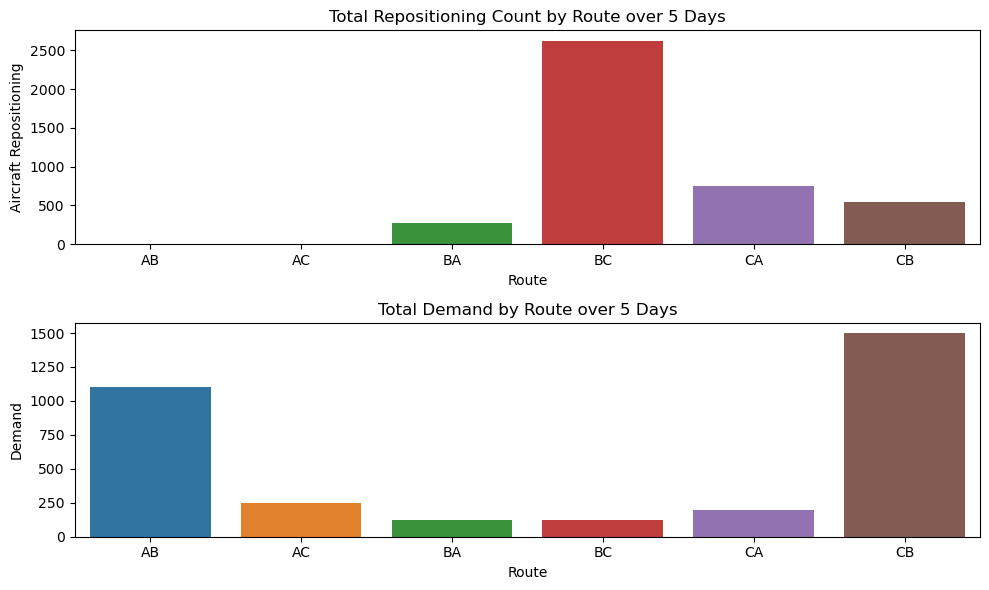

In [14]:
group_df = cargo_df.groupby(by=["Source","Destination"],as_index=False).sum()

fig,axes = plt.subplots(2,1,figsize=(10,6))
sns.barplot(data=group_df, x="Route", y="Aircraft Repositioning",hue="Route",ax=axes[0],palette="tab10")
axes[0].set_xticks(np.arange(6), ["AB","AC","BA","BC","CA","CB"])
axes[0].set_title("Total Repositioning Count by Route over 5 Days")

sns.barplot(data=group_df, x="Route", y="Demand",hue="Route",ax=axes[1],palette="tab10")
axes[1].set_xticks(np.arange(6), ["AB","AC","BA","BC","CA","CB"])
axes[1].set_title("Total Demand by Route over 5 Days")
plt.tight_layout()
plt.show()


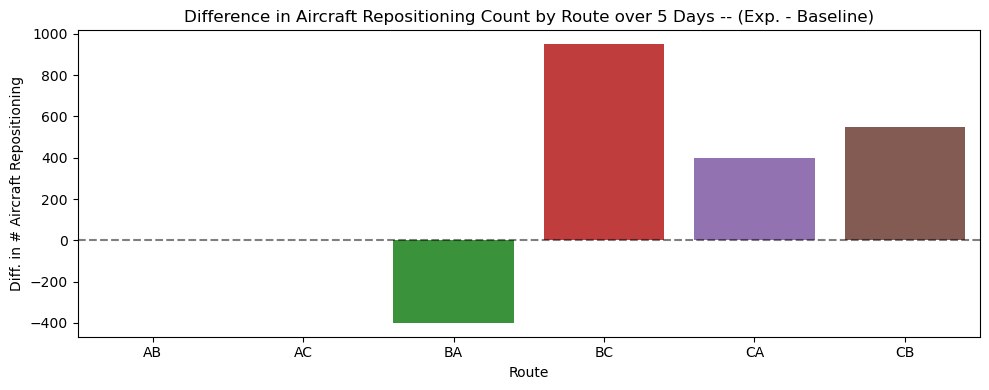

In [15]:
base_total_repos_group = base_df.groupby(by=["Source","Destination"],as_index=False).sum()
base_total_repos = base_total_repos_group["Aircraft Repositioning"].tolist()

exp_total_repos_group = cargo_df.groupby(by=["Source","Destination"],as_index=False).sum()
exp_total_repos = exp_total_repos_group["Aircraft Repositioning"].tolist()

routes = base_total_repos_group["Route"].tolist()
days = base_total_repos_group["Day"].tolist()

total_repos_diff_df = pd.DataFrame.from_dict({
    "Route":routes, "Diff":[exp - base for exp,base in zip(exp_total_repos, base_total_repos)], "Day":days
})

fig,axes = plt.subplots(1,1,figsize=(10,4))
sns.barplot(data=total_repos_diff_df, x="Route", y="Diff",hue="Route",ax=axes,palette="tab10")
axes.set_xticks(np.arange(6), ["AB","AC","BA","BC","CA","CB"])
axes.set_title("Difference in Aircraft Repositioning Count by Route over 5 Days -- (Exp. - Baseline)")
axes.axhline([0], ls="--",c="k",alpha=0.5)
axes.set_ylabel("Diff. in # Aircraft Repositioning")
plt.tight_layout()
plt.show()

#### We can see that once the fleet is large enough, the model reduces the number of leftover cargo down to 0 because it is more expensive than repositioning costs. At a fleet size of 1500, there are enough extra aircraft to transport cargo at exactly the amount of demand needed. This also results in large changes to the number of aircraft being repositioned, specifically large increases in BC, CA, and CB routes (two of which are the least costly), and a decrease in the BA route (tied for being the most costly). Since we used equal aircraft flow balance constraints, there cannot be leftover aircraft held at an airport for use the next day, thus the large overall increase in the number of aircraft repositioning movements.

#### Export results

In [16]:
cargo_df.to_csv("results/largeFleet_results.csv",index=False)